In [24]:
# -- Use the following for Google Colab
#! pip install -q 'lalsuite==6.66' 'PyCBC==1.15.3' 

## Playing with the waveforms

Here we will learn how to generate a GW waveform. Let us first discover which are the waveform approximants that we have available. 

We can either generate a waveform in time 

In [25]:
%matplotlib inline
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt

In [26]:
from pycbc.waveform import td_approximants, fd_approximants

# List of td approximants that are available
print(td_approximants())

# List of fd approximants that are currently available
print(fd_approximants())

['TaylorT1', 'TaylorT2', 'TaylorT3', 'SpinTaylorT1', 'SpinTaylorT4', 'SpinTaylorT5', 'PhenSpinTaylor', 'PhenSpinTaylorRD', 'EOBNRv2', 'EOBNRv2HM', 'TEOBResum_ROM', 'SEOBNRv1', 'SEOBNRv2', 'SEOBNRv2_opt', 'SEOBNRv3', 'SEOBNRv3_pert', 'SEOBNRv3_opt', 'SEOBNRv3_opt_rk4', 'SEOBNRv4', 'SEOBNRv4_opt', 'SEOBNRv4P', 'SEOBNRv4PHM', 'SEOBNRv2T', 'SEOBNRv4T', 'SEOBNRv4_ROM_NRTidalv2', 'SEOBNRv4_ROM_NRTidalv2_NSBH', 'HGimri', 'IMRPhenomA', 'IMRPhenomB', 'IMRPhenomC', 'IMRPhenomD', 'IMRPhenomD_NRTidalv2', 'IMRPhenomNSBH', 'IMRPhenomHM', 'IMRPhenomPv2', 'IMRPhenomPv2_NRTidal', 'IMRPhenomPv2_NRTidalv2', 'TaylorEt', 'TaylorT4', 'EccentricTD', 'SpinDominatedWf', 'NR_hdf5', 'NRSur7dq2', 'NRSur7dq4', 'SEOBNRv4HM', 'NRHybSur3dq8', 'IMRPhenomXAS', 'IMRPhenomXHM', 'IMRPhenomPv3', 'IMRPhenomPv3HM', 'TaylorF2', 'SEOBNRv1_ROM_EffectiveSpin', 'SEOBNRv1_ROM_DoubleSpin', 'SEOBNRv2_ROM_EffectiveSpin', 'SEOBNRv2_ROM_DoubleSpin', 'EOBNRv2_ROM', 'EOBNRv2HM_ROM', 'SEOBNRv2_ROM_DoubleSpin_HI', 'SEOBNRv4_ROM', 'IMRPheno

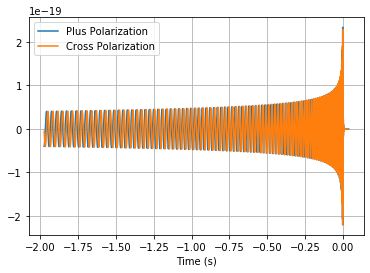

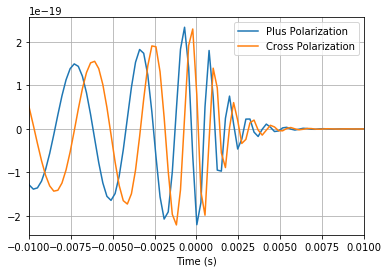

In [27]:
# The output of this function are the "plus" and "cross" polarizations of the gravitational-wave signal 
# as viewed from the line of sight at a given source inclination (assumed face-on if not provided)
hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=10,
                         mass2=10,
                         delta_t=1.0/4096,
                         f_lower=30)

plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.legend()
plt.grid()
plt.show()

# Zoom in near the merger time#
plt.plot(hp.sample_times, hp, label='Plus Polarization')
plt.plot(hp.sample_times, hc, label='Cross Polarization')
plt.xlabel('Time (s)')
plt.xlim(-.01, .01)
plt.legend()
plt.grid()
plt.show()

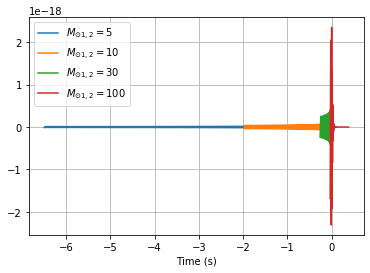

In [28]:
# Component mass of each binary component. We'll simplify here and assume that each 
# component of the binary has the same mass. Again, units are in solar masses.
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)
    
    
    plt.plot(hp.sample_times, hp, label='$M_{\odot 1,2}=%s$' % m)
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.show()

We can also use the waveform generator for studying the fourier transform of your CBC signal. You just need to call the method "tofrequencyseries()" and you will return the frequencyseries class of the CBC. When we increase the masses of the CBC, this coalesces before since the objects are bigger.

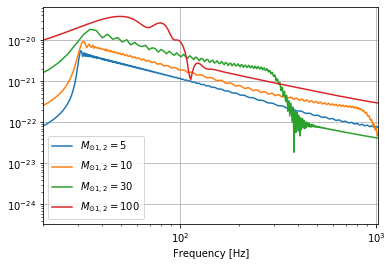

In [29]:
for m in [5, 10, 30, 100]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=m,
                         mass2=m,
                         delta_t=1.0/4096,
                         f_lower=30)
    
    hp=hp.to_frequencyseries()
    
    
    plt.loglog(hp.sample_frequencies, abs(hp), label='$M_{\odot 1,2}=%s$' % m)
plt.legend()
plt.grid()
plt.xlabel('Frequency [Hz]')
plt.xlim([20,1024])
plt.show()

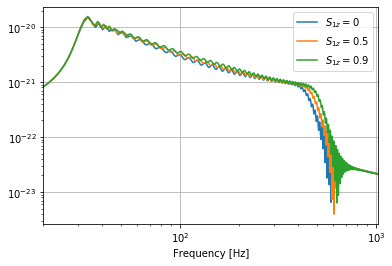

In [30]:
for s in [0, 0.5, 0.9]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=20,
                         mass2=20,
                         delta_t=1.0/4096,
                         f_lower=30,
                         spin1z=s,spin2z=-0.2)
     
    hp=hp.to_frequencyseries()
    
    
    plt.loglog(hp.sample_frequencies, abs(hp), label='$S_{1z}=%s$' % s)
plt.legend()
plt.grid()
plt.xlim([20,1024])
plt.xlabel('Frequency [Hz]')
plt.show()

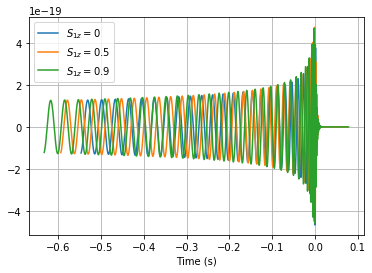

In [31]:
for s in [0, 0.5, 0.9]:
    hp, hc = get_td_waveform(approximant="SEOBNRv4_opt",
                         mass1=20,
                         mass2=20,
                         delta_t=1.0/4096,
                         f_lower=30,
                         spin1z=s,spin2z=-0.2)
    
    plt.plot(hp.sample_times, hp, label='$S_{1z}=%s$' % s)
plt.legend()
plt.grid()
plt.xlabel('Time (s)')
plt.show()

## Challenge:

Can you compare the SEOBNRv4_opt with the IMRPhenmD approximator for several binaries? What are the main differences?
Try to check the differences in frequency and time for differnt values of the masses and the spins.
